In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 14.8 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

model = YOLO("yolov10s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 15.9M/15.9M [00:00<00:00, 125MB/s] 


In [3]:
!mkdir datasets
%cd datasets

/content/datasets


In [4]:
!unzip card_data.zip

Archive:  card_data.zip
   creating: card_data/
   creating: card_data/test/
   creating: card_data/test/images/
  inflating: card_data/test/images/IMG_20220316_134602_jpg.rf.9802a712c2788e3f8a7e872f1d856773.jpg  
  inflating: card_data/test/images/IMG_20220316_134814_jpg.rf.936fa75110b13834d910cfdc7d3a5b31.jpg  
  inflating: card_data/test/images/IMG_20220316_134837_jpg.rf.6588c2bed2bbf43c4c818f65f05bc0dc.jpg  
  inflating: card_data/test/images/IMG_20220316_134840_jpg.rf.5cd97a13e682e0b5adc5b4d9ff527278.jpg  
  inflating: card_data/test/images/IMG_20220316_134858_jpg.rf.56b26a40076652072a1b499cbc93c627.jpg  
  inflating: card_data/test/images/IMG_20220316_134944_jpg.rf.9f7fc22f550c90e2990b64250acbe9ab.jpg  
  inflating: card_data/test/images/IMG_20220316_135003_jpg.rf.596d5b9a645fb8fbb7d1ec1513c8c333.jpg  
  inflating: card_data/test/images/IMG_20220316_135021_jpg.rf.56bd683da48e602aed04685145bba2f5.jpg  
  inflating: card_data/test/images/IMG_20220316_135030_jpg.rf.97bf69b80c2934323

In [5]:
!ls card_data

test  train  val


In [10]:
!pwd

/content/datasets


In [11]:
# 사용할 데이터셋 경로 및 데이터셋의 yaml 파일 경로 지정
data_dir = 'card_data'
data_yaml = 'card_data/data.yaml'

In [12]:
import yaml

# 데이터셋 yaml 파일 확인
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 4,
 'names': ['Diamonds', 'Hearts', 'Spades', 'Trefoils']}

In [16]:
# yaml 파일의 train, val 데이터가 있는 경로 수정 (기존 경로 -> 구글 드라이브에 저장된 경로로)
film['train'] = '/content/datasets/card_data/train/images'
film['val'] = '/content/datasets/card_data/val/images'
film['test'] = '/content/datasets/card_data/test/images'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

변경된 yaml 파일 :


{'names': ['Diamonds', 'Hearts', 'Spades', 'Trefoils'],
 'nc': 4,
 'test': '/content/datasets/card_data/test/images',
 'train': '/content/datasets/card_data/train/images',
 'val': '/content/datasets/card_data/val/images'}

# 4. YOLOv10 모델 학습
- 배치사이즈, 학습 에폭, 모델 사이즈 등을 선택하여 학습시킬 수 있음
- 학습 결과 중 베스트 모델이 저장됨 -> 모델 저장된 경로 확인 필수!
  - img: 입력 이미지 크기
  - batch: 배치 사이즈
  - epochs: 총 학습 에폭
  - data: 데이터셋 yaml 파일 경로
  - weights: 모델 웨이트 경로(pre-train된 모델로 학습시키기 때문에)
  - cache: 캐시 이미지

In [17]:
%pwd

'/content/datasets'

In [18]:
results = model.train(data=data_yaml, epochs=200, imgsz=640, device=0)

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=card_data/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.0MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/card_data/train/labels... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 1098.11it/s]

train: New cache created: /content/datasets/card_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/card_data/val/labels... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 994.63it/s]

val: New cache created: /content/datasets/card_data/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      5.18G      1.719      15.16      2.716         29        640: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         51        216      0.166      0.216      0.118     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.16G      1.848       15.6      2.728         29        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         51        216       0.18      0.179      0.159      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.21G      1.545      12.77      2.492         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         51        216      0.283       0.39      0.325      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      5.18G      1.385      9.197      2.298         40        640: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         51        216      0.323      0.465      0.361      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.18G      1.215      7.145       2.19         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         51        216      0.312      0.404      0.425      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.24G      1.239      5.883      2.161         19        640: 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         51        216      0.785      0.542      0.629      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.19G      1.139      4.701      2.127         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         51        216      0.325      0.358      0.371      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.18G      1.172      3.783      2.097         40        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         51        216      0.368      0.346      0.395       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.22G      1.102      4.176      2.015         22        640: 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         51        216      0.452      0.519      0.471        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.19G      1.039      2.978      1.896         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         51        216      0.876      0.566      0.713      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       5.2G      1.244      2.707      2.116         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         51        216      0.412      0.723      0.434      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.22G      1.248      2.403       2.09         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         51        216      0.667      0.457      0.526      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.19G      1.222      2.169      2.068         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         51        216      0.415      0.387      0.441      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.21G       1.27      1.902      2.104         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         51        216      0.369      0.367      0.389      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.22G      1.304      1.894      2.166         27        640: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         51        216      0.489      0.858      0.632      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.19G      1.159      1.711      1.994         35        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         51        216       0.57      0.758      0.682      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.24G      1.199      1.555      2.051         20        640: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         51        216      0.921      0.728      0.911      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.21G      1.151      1.496       1.95         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         51        216      0.704      0.604      0.691      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.37G      1.251      1.439      2.081         20        640: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         51        216      0.762      0.468      0.609       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.21G      1.221      1.443      2.102         22        640: 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216      0.687      0.608      0.714      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.24G      1.591      1.712       2.41         20        640: 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         51        216      0.344      0.635      0.378      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       5.2G      1.322      1.535      2.214         14        640: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         51        216      0.606      0.495      0.531       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.23G       1.28      1.298      2.166         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         51        216      0.285      0.561      0.317      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       5.2G      1.149      1.117      1.966         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         51        216       0.31      0.679      0.547       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       5.2G      1.386       1.25      2.082         30        640: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         51        216      0.325      0.687      0.483      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       5.2G      1.429      1.356      2.156         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         51        216      0.273      0.426      0.355      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       5.2G      1.176      1.122      2.004         25        640: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         51        216      0.285      0.282      0.246      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.23G      1.393      1.217      2.116         18        640: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all         51        216      0.326      0.275      0.289      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200       5.2G      1.181      1.158      2.031         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         51        216      0.339      0.361      0.366      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200       5.2G      1.277      1.046      2.083         29        640: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         51        216      0.342      0.346      0.358      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.23G       1.38      1.109       2.12         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         51        216      0.582      0.497      0.602       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.23G      1.286      1.079      2.042         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         51        216       0.69      0.618      0.704      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.23G      1.136      1.096      1.991         22        640: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all         51        216      0.898      0.594      0.738      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       5.2G      1.182      1.018      2.007         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.435      0.328      0.399      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.24G      1.233      1.219      2.047         20        640: 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         51        216      0.341      0.314       0.35      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       5.2G      1.201     0.9407      2.026         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         51        216      0.807      0.407      0.427      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       5.2G       1.16     0.9705       2.08         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         51        216      0.761      0.593      0.687      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200       5.2G      1.268     0.9852      2.074         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         51        216      0.651      0.645      0.627      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200       5.2G      1.178     0.9496      1.992         24        640: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         51        216      0.618      0.702      0.684      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.23G      1.102     0.8763      2.018         27        640: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         51        216      0.738      0.805      0.784      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.23G      1.175       1.08      2.036         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         51        216      0.716      0.757      0.841      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.23G      1.199      1.179      2.078         16        640: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.693      0.882      0.861      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.21G      1.112     0.8931      1.965         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         51        216      0.728       0.91      0.881      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       5.2G      1.147     0.8293      1.956         32        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         51        216       0.88      0.801      0.912      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.23G       1.22     0.9111      2.093         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         51        216      0.788      0.951      0.926       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.23G      1.094     0.8477       1.99         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         51        216      0.947      0.902       0.97      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200       5.2G      1.194      0.958      2.019         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         51        216      0.895      0.914       0.97      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.24G      1.222      1.154      2.136         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         51        216      0.843       0.81       0.91      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.23G      1.127     0.9286      1.998         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         51        216      0.918      0.779      0.926      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.21G      1.098      0.851      1.967         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.933      0.733      0.914      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200       5.2G      1.107     0.9316      1.985         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         51        216        0.9      0.741      0.899      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       5.2G      1.048     0.7288      1.966         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         51        216      0.864      0.789      0.908      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.21G      1.107     0.9256       1.98         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         51        216      0.732      0.829      0.905      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.23G      1.102     0.8581      1.995         35        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         51        216      0.878      0.765      0.915      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.23G       1.11     0.8041      2.019         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         51        216      0.912      0.912      0.957      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200       5.2G      1.019     0.7209      1.923         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         51        216      0.851      0.975      0.964      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.23G     0.9975     0.7341      1.966         21        640: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         51        216      0.904      0.925      0.962      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       5.2G      1.035     0.8184      1.991         21        640: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         51        216      0.849      0.931      0.947      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       5.2G     0.9942     0.7614      1.949         36        640: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         51        216      0.825      0.819       0.87      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200       5.2G      1.078     0.7525       2.04         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216      0.824      0.826      0.882      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200       5.2G      1.105     0.8278       2.04         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         51        216      0.907      0.861      0.916      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       5.2G     0.9653     0.7124      1.936         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         51        216      0.927      0.885      0.937      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200       5.2G      1.164      0.928      2.058         16        640: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         51        216      0.886      0.926       0.96      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.21G     0.9461     0.7438       1.95         23        640: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.866      0.926       0.94      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.23G     0.9604     0.9643      1.913         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.969       0.83      0.951      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.21G       1.09     0.8845      2.017         19        640: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.869      0.828      0.912      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       5.2G      1.024     0.7656      1.962         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         51        216      0.667      0.612      0.607       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       5.2G     0.8539     0.6565      1.854         37        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         51        216      0.777       0.37      0.428      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       5.2G      1.045      0.709      1.973         31        640: 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         51        216      0.786      0.453      0.513      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.23G     0.9233     0.6078       1.87         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         51        216      0.819      0.796      0.907      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200       5.2G     0.9115     0.6843      1.929         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         51        216      0.912      0.821      0.932      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200       5.2G     0.9316     0.6704      1.906         25        640: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         51        216      0.893      0.814      0.936       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.23G     0.9959     0.6704      1.905         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         51        216      0.911      0.786        0.9      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       5.2G     0.9916     0.6906      2.055         19        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         51        216      0.902      0.887      0.938       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200       5.2G     0.8769     0.7424      1.875         21        640: 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         51        216       0.97       0.86      0.948      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.23G      1.095     0.8356      2.042         31        640: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         51        216      0.973      0.828      0.944      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.23G     0.9706     0.7387      1.909         29        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         51        216      0.949      0.967      0.971      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.21G     0.9417     0.6354      1.917         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         51        216      0.952      0.917      0.988      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200       5.2G     0.9582     0.7132      1.962         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         51        216      0.861      0.966      0.967      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.23G     0.9846        0.7      1.976         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         51        216      0.915      0.964      0.985      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.23G     0.8652     0.5851      1.891         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         51        216       0.86      0.972      0.974      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.21G      1.042     0.6977      2.087         21        640: 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         51        216      0.958      0.921      0.973       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.21G      1.158     0.7797      2.194         13        640: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         51        216      0.844      0.983      0.951      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.21G     0.8989     0.6476       1.89         39        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         51        216      0.917      0.924       0.97      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.21G     0.9488     0.6683      1.931         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         51        216      0.935      0.918      0.978      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200       5.2G      1.035     0.7007       1.98         27        640: 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         51        216      0.982      0.974      0.993      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       5.2G      1.015     0.7034      1.922         36        640: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         51        216      0.892      0.974      0.965      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       5.2G     0.9158     0.5936      1.907         20        640: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         51        216      0.938      0.931      0.974      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       5.2G     0.8568     0.7055      1.893         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         51        216      0.936      0.988      0.985      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       5.2G     0.8327     0.6213      1.883         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         51        216      0.949      0.981      0.983      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       5.2G      1.039     0.6717      1.972         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         51        216       0.94      0.983      0.988      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       5.2G      1.001     0.7542      1.916         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         51        216      0.923      0.964      0.984       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       5.2G     0.9572     0.6843      1.902         22        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         51        216      0.955      0.953      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.23G      1.123     0.8096      2.128         15        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.954      0.957       0.99      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.21G     0.8283     0.6455      1.877         23        640: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         51        216      0.949      0.923      0.984      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.23G       1.07       0.79      2.063         12        640: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         51        216      0.994      0.917       0.99      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.23G     0.8213     0.5446      1.861         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         51        216      0.946      0.974      0.984      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       5.2G      0.898     0.5858      1.894         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         51        216      0.977      0.968      0.993      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.21G     0.9242      0.644      1.949         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         51        216      0.987      0.974      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       5.2G     0.9498     0.6495        1.9         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         51        216       0.99      0.982      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.21G     0.9431     0.6981      1.953         14        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216      0.874      0.988      0.973      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       5.2G     0.8116     0.5902      1.899         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         51        216       0.95      0.936      0.968      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       5.2G     0.9154     0.6053      1.958         14        640: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         51        216      0.912      0.969      0.982      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       5.2G     0.8437     0.6528      1.914         34        640: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         51        216      0.942       0.94      0.981      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.21G     0.9271     0.5929      1.968         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         51        216      0.987      0.892       0.97      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       5.2G     0.8832     0.6239      1.902         35        640: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         51        216      0.951      0.988      0.991      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200       5.2G     0.8875     0.6219      1.929         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         51        216      0.909       0.99      0.979       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       5.2G     0.7735     0.4976      1.809         37        640: 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         51        216      0.897      0.953      0.974      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.23G      0.847     0.5393      1.875         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         51        216      0.952      0.989      0.985      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.21G     0.7319      0.516      1.861         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         51        216      0.952      0.985      0.982      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.23G     0.6992     0.4777      1.807         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.952      0.988      0.988      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.21G     0.8132     0.5754       1.93         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         51        216      0.984      0.975      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.21G       0.85     0.7113      1.911         15        640: 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         51        216      0.944      0.985      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       5.2G     0.7682     0.5424       1.84         25        640: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         51        216      0.996      0.979      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.23G     0.8752     0.5725      1.881         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         51        216      0.944      0.985      0.991      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200       5.2G     0.7478     0.5352      1.839         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         51        216      0.978       0.99      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.21G     0.8053      0.544       1.87         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         51        216      0.987      0.983      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200       5.2G     0.8627     0.5315      1.882         21        640: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         51        216      0.991      0.983      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200       5.2G     0.9004     0.6932      1.954         27        640: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         51        216      0.992      0.975      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.21G     0.8393     0.5562      1.854         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         51        216      0.998      0.979      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.23G     0.7532     0.5194      1.876         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         51        216      0.997      0.981      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.21G     0.8317     0.5515      1.925         17        640: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.997      0.941      0.986      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.23G     0.7805     0.5961      1.823         43        640: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         51        216      0.948       0.99      0.991       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.21G     0.7644      0.552      1.839         17        640: 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         51        216      0.943      0.941      0.983      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200       5.2G     0.7196     0.4822      1.795         24        640: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         51        216       0.97      0.954      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       5.2G     0.7309     0.5292      1.803         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         51        216      0.973      0.991      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       5.2G     0.7526     0.5419      1.832         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.924      0.993      0.991      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200       5.2G     0.7354     0.5561      1.861         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         51        216       0.98      0.982      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      5.23G     0.7272     0.4685      1.833         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         51        216      0.988      0.985      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200       5.2G      0.802     0.5503      1.895         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         51        216       0.99      0.978      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       5.2G     0.7919     0.5738      1.877         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216          1      0.969      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      5.23G     0.7327     0.5078      1.818         27        640: 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         51        216      0.983      0.966      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      5.23G     0.7586     0.5162      1.849         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         51        216          1      0.968      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200       5.2G     0.7384     0.5246      1.827         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         51        216      0.947       0.98      0.989      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200       5.2G     0.7063     0.5039      1.818         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         51        216      0.954      0.964      0.989      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       5.2G     0.8514     0.6216      1.833         45        640: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         51        216      0.957      0.956      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200       5.2G     0.7731     0.4899      1.912         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         51        216       0.95      0.957      0.992      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       5.2G     0.7209     0.5343      1.844         32        640: 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         51        216      0.979      0.967      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       5.2G      0.821     0.6096      1.926         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         51        216       0.99      0.975      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200       5.2G     0.7643     0.5461      1.858         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         51        216       0.96      0.957      0.992      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.21G     0.7292      0.505      1.841         31        640: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.954      0.997      0.985      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      5.23G     0.7721     0.5111      1.872         37        640: 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         51        216      0.952      0.993      0.979      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200       5.2G     0.6621     0.4297      1.777         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         51        216       0.91      0.991      0.975      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200       5.2G     0.7926     0.5776      1.845         45        640: 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         51        216      0.934      0.994      0.982      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       5.2G     0.7771     0.6825      1.855         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         51        216      0.987      0.946      0.989      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200       5.2G     0.7217     0.4709      1.861         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         51        216      0.975      0.951      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.23G     0.7736     0.5147      1.899         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.972      0.991      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       5.2G      0.625     0.4379      1.758         30        640: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216      0.977      0.986      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       5.2G     0.7378     0.4953      1.874         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         51        216       0.98      0.987      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      5.21G     0.7895     0.5054      1.934         27        640: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         51        216       0.99      0.996      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       5.2G     0.6971     0.4728      1.802         32        640: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         51        216       0.98      0.995      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       5.2G     0.6743     0.4545      1.808         27        640: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         51        216      0.986      0.983      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       5.2G     0.6951     0.4563      1.828         32        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         51        216       0.99      0.985      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       5.2G     0.6702     0.4477      1.771         42        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         51        216      0.992      0.988      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       5.2G     0.6336     0.4222      1.789         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         51        216      0.953      0.982      0.985      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.23G     0.6632     0.4358       1.82         21        640: 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         51        216      0.946      0.983      0.988      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.23G     0.7023     0.4386      1.867         13        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         51        216      0.953      0.978      0.991      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.21G     0.6217     0.4139      1.761         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         51        216      0.959      0.982      0.992      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.23G     0.6505     0.4514      1.781         33        640: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         51        216      0.958      0.986      0.992      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200       5.2G     0.6322     0.4209      1.771         21        640: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         51        216       0.96      0.987      0.985      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200       5.2G      0.711     0.5492      1.802         31        640: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         51        216      0.956      0.985      0.989      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200       5.2G     0.6327     0.4602      1.823         25        640: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         51        216      0.958      0.991      0.989      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      5.21G     0.6139     0.4124      1.829         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         51        216      0.951      0.935      0.983       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200       5.2G     0.6526      0.468      1.853         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         51        216      0.916      0.993      0.979      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       5.2G     0.6589     0.4615      1.842         34        640: 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         51        216      0.887      0.987      0.981      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200       5.2G     0.6635     0.4627      1.784         22        640: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         51        216      0.995      0.942      0.989      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200       5.2G     0.6908     0.4765      1.835         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         51        216      0.951       0.99      0.988      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.21G     0.6813     0.4563      1.849         39        640: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         51        216      0.987      0.995      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.21G     0.6796     0.4735      1.838         21        640: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         51        216      0.994      0.987      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      5.23G      0.652     0.4094       1.79         30        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         51        216      0.992      0.995      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.23G      0.605     0.4007      1.777         36        640: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         51        216      0.989      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       5.2G     0.7835     0.5091      1.877         34        640: 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         51        216      0.984      0.982      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       5.2G     0.5891     0.4264      1.776         19        640: 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         51        216      0.993      0.948      0.992      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200       5.2G     0.5629      0.389      1.733         29        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         51        216      0.992      0.986      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.23G     0.5591     0.3712      1.716         19        640: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         51        216      0.992      0.995      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       5.2G     0.6339     0.4071      1.813         20        640: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         51        216      0.997      0.983      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       5.2G     0.6493     0.4407      1.811         14        640: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         51        216      0.988      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       5.2G     0.5838     0.4375      1.806         33        640: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         51        216      0.987      0.995      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.23G     0.5934     0.4251      1.774         27        640: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         51        216      0.991       0.93      0.989      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.21G      0.641      0.426      1.812         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         51        216      0.989      0.988      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.23G     0.6699      0.431      1.843         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         51        216      0.991       0.99      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200       5.2G     0.6211     0.4283      1.832         22        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         51        216      0.997      0.987      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.21G      0.644     0.4629      1.845         22        640: 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         51        216      0.994      0.988      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.21G     0.6259      0.421       1.82         23        640: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         51        216      0.994       0.99      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200       5.2G      0.624     0.4142      1.752         33        640: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         51        216      0.993      0.987      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200       5.2G     0.6387     0.4425      1.811         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         51        216      0.986      0.985      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.24G     0.5757     0.4293      1.782         12        640: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         51        216      0.995      0.986      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.23G     0.6098     0.4226      1.818         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216          1      0.989      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       5.2G     0.6355      0.427      1.822         25        640: 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         51        216          1      0.986      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.21G     0.5149     0.3792      1.726         15        640: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         51        216          1      0.991      0.995      0.994


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.18G     0.3379     0.2689      1.624         12        640: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         51        216      0.951      0.998      0.992      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      5.18G      0.357     0.3102      1.552         13        640: 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         51        216      0.952      0.997      0.992      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.18G     0.3272     0.2878      1.572         12        640: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         51        216      0.951      0.994      0.992      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      5.18G     0.3187     0.2497       1.58         12        640: 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         51        216      0.994      0.992      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.18G     0.3301      0.271      1.565         13        640: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         51        216      0.993      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.18G      0.364     0.3379       1.61         13        640: 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all         51        216      0.995      0.984      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.18G     0.3659     0.2958      1.602         13        640: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         51        216      0.994      0.964      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.18G     0.3421     0.2684      1.566         12        640: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         51        216      0.994      0.982      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.18G     0.3303     0.2645      1.549         12        640: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         51        216      0.995      0.976      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.18G     0.3344     0.2589      1.591         13        640: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         51        216      0.994      0.981      0.995      0.994



200 epochs completed in 0.100 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]


                   all         51        216          1      0.985      0.995      0.994
                Hearts          3         12          1      0.982      0.995      0.995
                Spades         48        204          1      0.989      0.995      0.994
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2


# 학습한 모델 테스트

In [19]:
# 테스트 이미지 경로
test_data_dir = film['test']
print(test_data_dir)
# 실험 번호 지정 - 진행한 실험이 저장된 경로 확인해서 기입! - runs/train/exp1 인지 exp2, exp3 인지 확인 후 아래 번호 지정
train_exp_num = 2

/content/datasets/card_data/test/images


In [20]:
model = YOLO("/content/datasets/runs/detect/train2/weights/best.pt")

In [21]:
results = model('/content/datasets/card_data/test/images/IMG_20220316_134602_jpg.rf.9802a712c2788e3f8a7e872f1d856773.jpg')
print(results[0].boxes)


image 1/1 /content/datasets/card_data/test/images/IMG_20220316_134602_jpg.rf.9802a712c2788e3f8a7e872f1d856773.jpg: 480x640 4 Spadess, 57.6ms
Speed: 2.4ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.9873, 0.9856, 0.9849, 0.9546], device='cuda:0')
data: tensor([[277.4078, 383.6556, 584.5955, 708.9036,   0.9873,   2.0000],
        [335.5429,  49.2650, 624.0203, 349.5695,   0.9856,   2.0000],
        [139.7599, 188.1310, 420.7307, 485.2703,   0.9849,   2.0000],
        [496.8420, 291.1175, 797.9160, 618.8972,   0.9546,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (720, 960)
shape: torch.Size([4, 6])
xywh: tensor([[431.0016, 546.2795, 307.1877, 325.2480],
        [479.7816, 199.4172, 288.4774, 300.3044],
        [280.2453, 336.7006, 280.9707, 297.1394],
        [647.3790, 455.0073, 301.0740, 327.7798]], device=

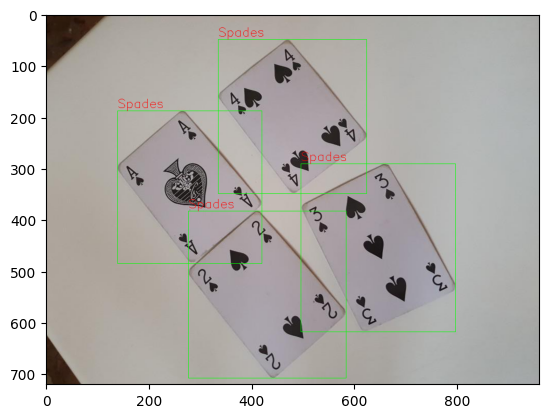

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('/content/datasets/card_data/test/images/IMG_20220316_134602_jpg.rf.9802a712c2788e3f8a7e872f1d856773.jpg')

green_color=(0, 255, 0)
red_color=(255, 0, 0)

clone = image.copy()
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    for box in boxes:
        xyxy = box.xyxy[0]
        # print(xyxy)
        cls = int(box.cls)
        # print(cls)
        xyxy = tuple(xyxy.cpu().numpy().astype(np.int32))
        # print(xyxy)
        pt1 = (xyxy[0], xyxy[1])
        pt2 = (xyxy[2], xyxy[3])
        cv2.rectangle(clone, pt1, pt2, color=green_color, thickness=1)
        caption = "{}".format(result.names[cls])
        cv2.putText(clone, caption, (xyxy[0], xyxy[1]-6), cv2.FONT_HERSHEY_SIMPLEX, 0.8, red_color, 1)

plt.imshow(clone)
plt.show()